In [1]:
import pandas as pd
from sklearn.manifold import Isomap
import numpy as np
from scipy.stats import zscore
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
dublin = pd.read_csv("Standardised_Dublin.csv") 
pd.options.display.float_format = '{:.5f}'.format

In [2]:
#preprocessing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
#distance=distance[distance.columns[26:829]]
# a=np.array(distance)
# #computing zscore
# z=zscore(a,axis=1)
# distance_norm=pd.DataFrame(z)§
# distance_norm

In [4]:
iso_results=Isomap(n_components=len(dublin),n_neighbors=15).fit_transform(dublin)

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/kernel_pca.py:278: RuntimeWarning: invalid value encountered in sqrt
  X_transformed = self.alphas_ * np.sqrt(self.lambdas_)


In [5]:
iso=pd.DataFrame(iso_results)

[[-9.15058898 -5.53881799]
 [15.23400133  6.85802437]
 [-5.40771298  9.95237643]
 [-0.72540283 -5.27062247]
 [-8.3990478   2.07338983]
 [ 3.77064656 13.14410602]
 [10.32942682 -8.03741812]
 [22.54949141 -3.00944411]]


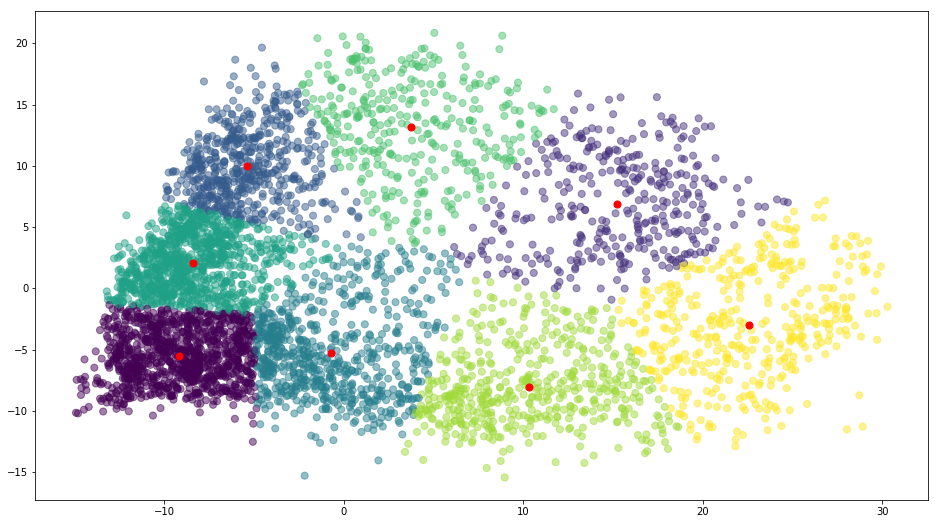

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
Data = [iso[0],iso[1]]
df = pd.DataFrame(Data)
df=df.T
kmeans = KMeans().fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
df.columns=["ISO[0]","ISO[1]"]
#df
plt.scatter(df["ISO[0]"], df["ISO[1]"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [8]:
shape=pd.read_csv("GDA_Shape.csv")
frames=[shape,iso]
shape_iso=pd.concat(frames,axis=1)
shape_iso.columns

Index(['small_area', 'shape__are', 'shape__len',            0,            1,            2,            3,            4,            5,            6,
       ...
               4871,         4872,         4873,         4874,         4875,         4876,         4877,         4878,         4879,         4880], dtype='object', length=4884)

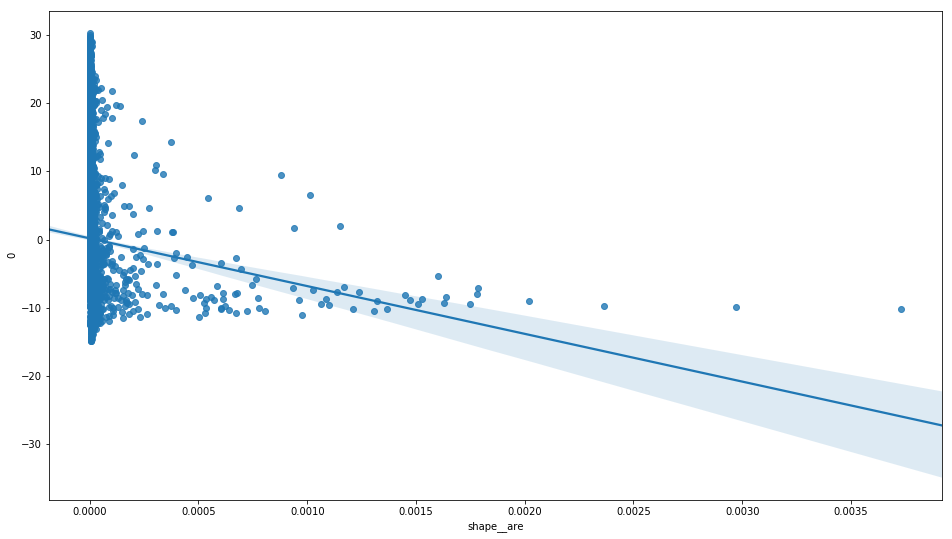

In [9]:
#shape_vector_10_2.plot.line('vector','shape__are')
import seaborn as sns
sns.regplot(shape_iso['shape__are'],shape_iso[0])

In [11]:
tsne=TSNE(n_components=3).fit_transform(dublin)

In [12]:
tsne_results=pd.DataFrame(tsne)
tsne_results

,0,1,2
0,-12.85037,-0.63232,3.56569
1,5.73371,9.82162,-11.21559
2,5.83616,10.11226,-10.66531
3,6.82031,8.31435,-9.35826
4,5.34688,9.69176,-10.46904
5,3.21282,5.77841,5.61630
6,-4.14032,-0.09940,-0.69448
7,6.64328,9.10187,-10.81592
8,5.79113,10.28587,-9.42902
9,0.98139,4.97803,5.67139


[[ -8.84689876  -6.62946772]
 [ 12.75805507  -7.27347303]
 [ -2.3308749    3.00308107]
 [-13.13377471   2.78127804]
 [  2.60160954  -7.17462955]
 [  9.49606945   4.6328716 ]
 [ -9.00133309   8.59746607]
 [  3.85501606  11.34777243]]


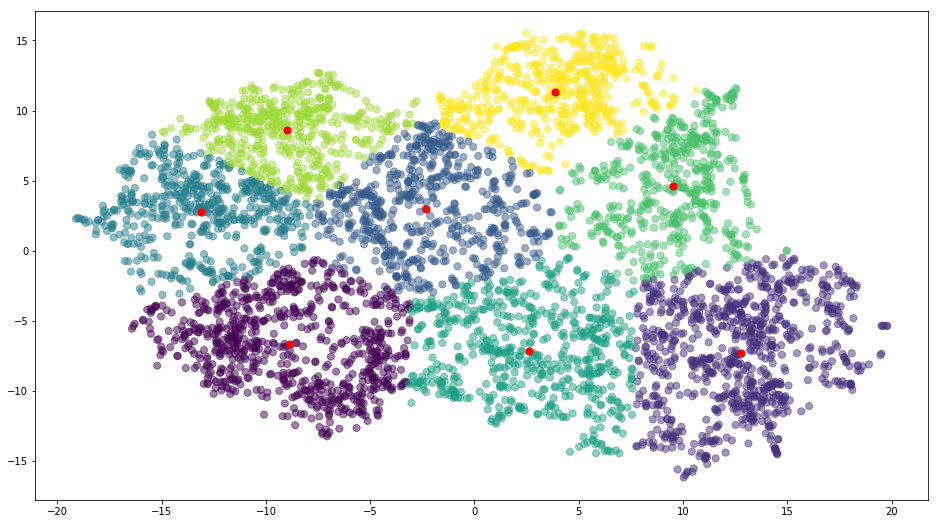

In [13]:
plt.rcParams['figure.figsize'] = (16, 9)
Data = [tsne_results[0],tsne_results[1]]
df = pd.DataFrame(Data)
df=df.T
kmeans = KMeans().fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
df.columns=["t-SNE[0]","t-SNE[1]"]
#df
plt.scatter(df["t-SNE[0]"], df["t-SNE[1]"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [14]:
shape=pd.read_csv("GDA_Shape.csv")
frames=[shape,tsne_results]
shape_tsne=pd.concat(frames,axis=1)
shape_tsne.columns

Index(['small_area', 'shape__are', 'shape__len', 0, 1, 2], dtype='object')

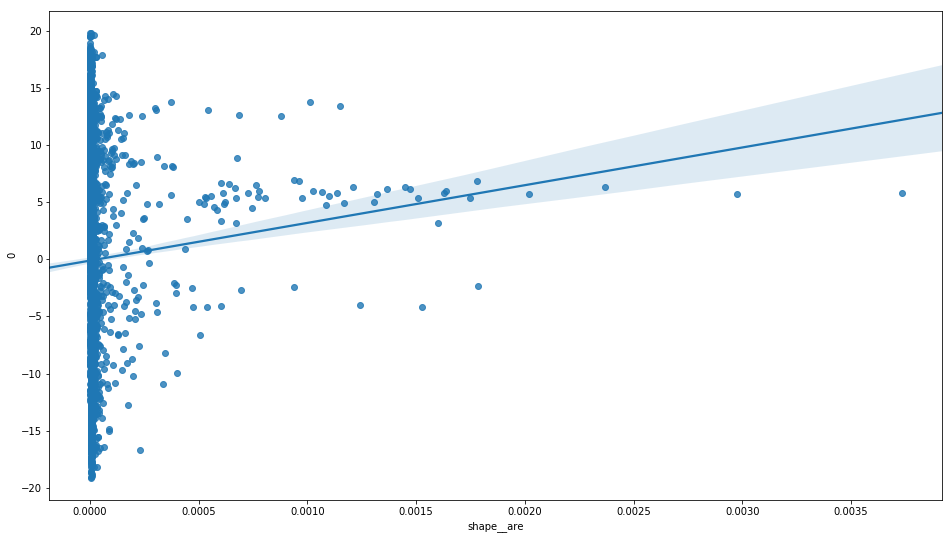

In [15]:
import seaborn as sns
sns.regplot(shape_tsne['shape__are'],shape_tsne[0])

In [ ]:
small_area_iso=pd.read_csv("GDA_Smallarea.csv")
small_area_iso.drop(['ogc_fid','fid','ogc_fid1','ogc_fid0'], axis=1, inplace=True)
small_area_iso["iso"]=iso[0]
small_area_iso.to_csv("GDA_Iso_5Sep.csv",index=False)

In [ ]:
small_area_tsne=pd.read_csv("GDA_Smallarea.csv")
small_area_tsne.drop(['ogc_fid','fid','ogc_fid1','ogc_fid0'], axis=1, inplace=True)
small_area_tsne["tsne"]=tsne_results[0]
small_area_tsne.to_csv("GDA_tSNE.csv",index=False)

In [10]:
second_ev = pd.read_csv("GDA_Second_eigen_15.csv")
#third_ev=pd.read_csv("GDA_Second_eigen_15.csv"#)
second_ev.rename(columns={'vector':'second_ev'},inplace=True)

In [11]:
#diffusion_iso=pd.concat([second_ev,small_area_iso],axis=1,keys=["edname","small_area"])
diffusion_iso = pd.merge(second_ev,small_area_iso, on=['small_area','edname'])
diffusion_tsne=pd.merge(second_ev,small_area_tsne,on=['small_area','edname'])
iso_tsne=pd.merge(small_area_iso,small_area_tsne,on=['small_area','edname'])

In [12]:
diffusion_iso

,edname,small_area,second_ev,iso
0,Baldoyle,267004005,0.01525,-12.74059
1,Tallaght-Kilnamanagh,267142010,0.01525,-12.15166
2,Tallaght-Avonbeg,267136002,0.01523,-12.60833
3,Tallaght-Kingswood,267144011,0.01522,-12.17223
4,Tallaght-Kilnamanagh,267142006,0.01520,-12.78380
5,Grange D,268074010,0.01518,-11.94077
6,Tallaght-Millbrook,267145001,0.01517,-11.61161
7,Tallaght-Kilnamanagh,267142013,0.01517,-12.53613
8,Ayrfield,268008011,0.01517,-12.34331
9,Baldoyle,267004004,0.01517,-12.38791


In [13]:
diffusion_tsne

,edname,small_area,second_ev,tsne
0,Baldoyle,267004005,0.01525,15.11155
1,Tallaght-Kilnamanagh,267142010,0.01525,14.78396
2,Tallaght-Avonbeg,267136002,0.01523,15.37037
3,Tallaght-Kingswood,267144011,0.01522,14.49967
4,Tallaght-Kilnamanagh,267142006,0.01520,14.61058
5,Grange D,268074010,0.01518,15.30606
6,Tallaght-Millbrook,267145001,0.01517,15.21924
7,Tallaght-Kilnamanagh,267142013,0.01517,14.55149
8,Ayrfield,268008011,0.01517,14.13805
9,Baldoyle,267004004,0.01517,15.23326


In [14]:
iso_tsne

,edname,small_area,iso,tsne
0,Priorswood E,268123009,-9.12044,9.99302
1,Ballinascorney,267006001,-9.89304,-5.05010
2,Bohernabreena,267035001,-10.19440,-4.83057
3,Newcastle,267107002,-7.92577,-6.24401
4,Glencullen,267092001,-9.44998,-4.56839
5,The Ward,267158009/02,-5.38701,3.92496
6,Dubber,267066001,-8.67532,-9.53198
7,Balbriggan Rural,267002034,-10.14477,-5.97888
8,Garristown,267091003,-9.21899,-4.35745
9,Garristown,267091002,-7.95985,4.87526


In [15]:
plt.rcParams['figure.figsize'] = (16, 9)

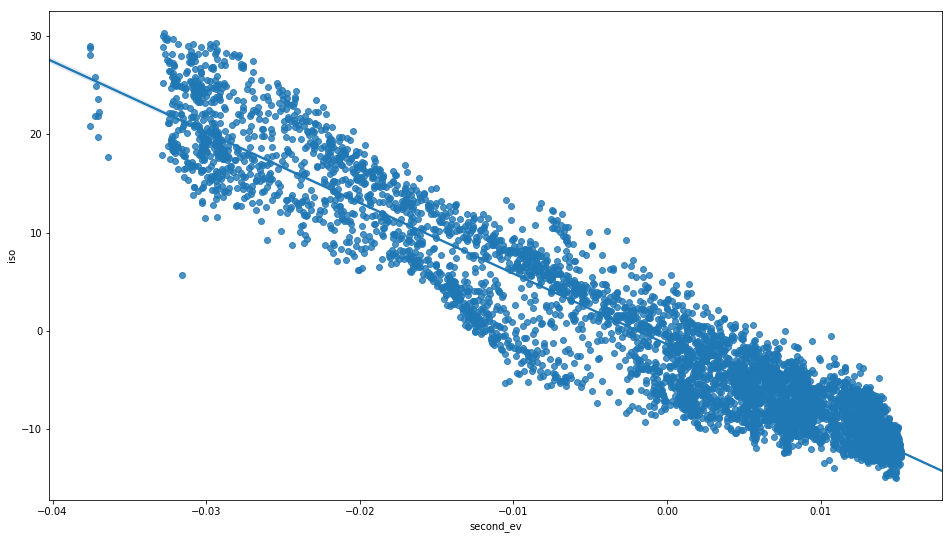

In [16]:
sns.regplot(diffusion_iso['second_ev'],diffusion_iso['iso'])

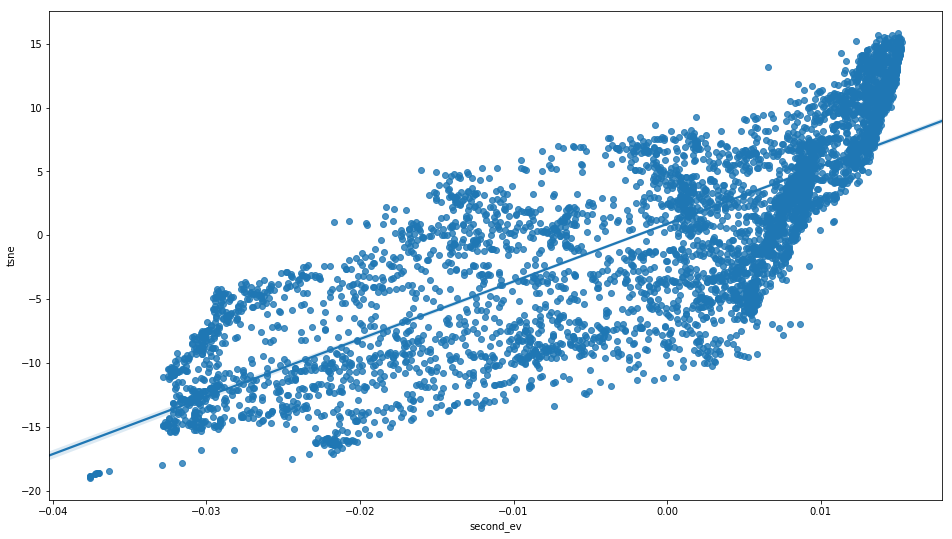

In [17]:
sns.regplot(diffusion_tsne['second_ev'],diffusion_tsne['tsne'])

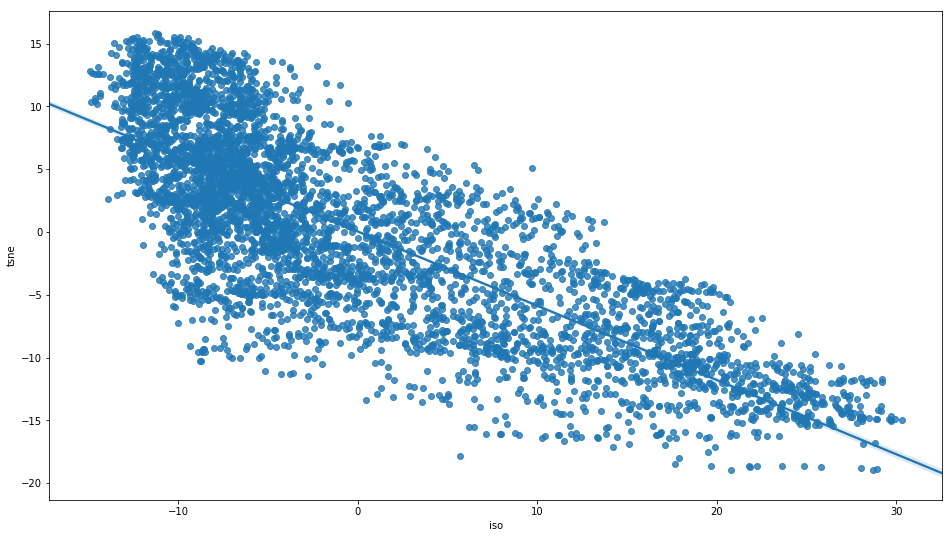

In [18]:
sns.regplot(iso_tsne['iso'],iso_tsne['tsne'])

In [19]:
from scipy.stats import linregress

In [20]:
linregress(iso_tsne['iso'],iso_tsne['tsne'])

LinregressResult(slope=-0.5914835528496036, intercept=0.04081705212593123, rvalue=-0.7964817509274372, pvalue=0.0, stderr=0.006428572082371277)